In [27]:
#%matplotlib widget
import os

from PIL import Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Visualize Image and Attentional Maps

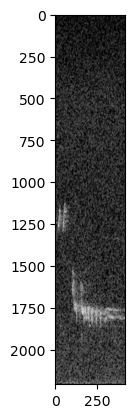

In [28]:
IMAGE_PATH = '/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/Single_Image_Attentional_Maps'
#IMAGE_PATH = '/grand/projects/BirdAudio/Soundscapes/Single_Image_Attentional_Maps'
#IMAGE_PATH = '/grand/projects/BirdAudio/Soundscapes/Single_Image_Attentional_Maps'
image = Image.open(os.path.join(IMAGE_PATH, 'img.png'))
plt.imshow(image)

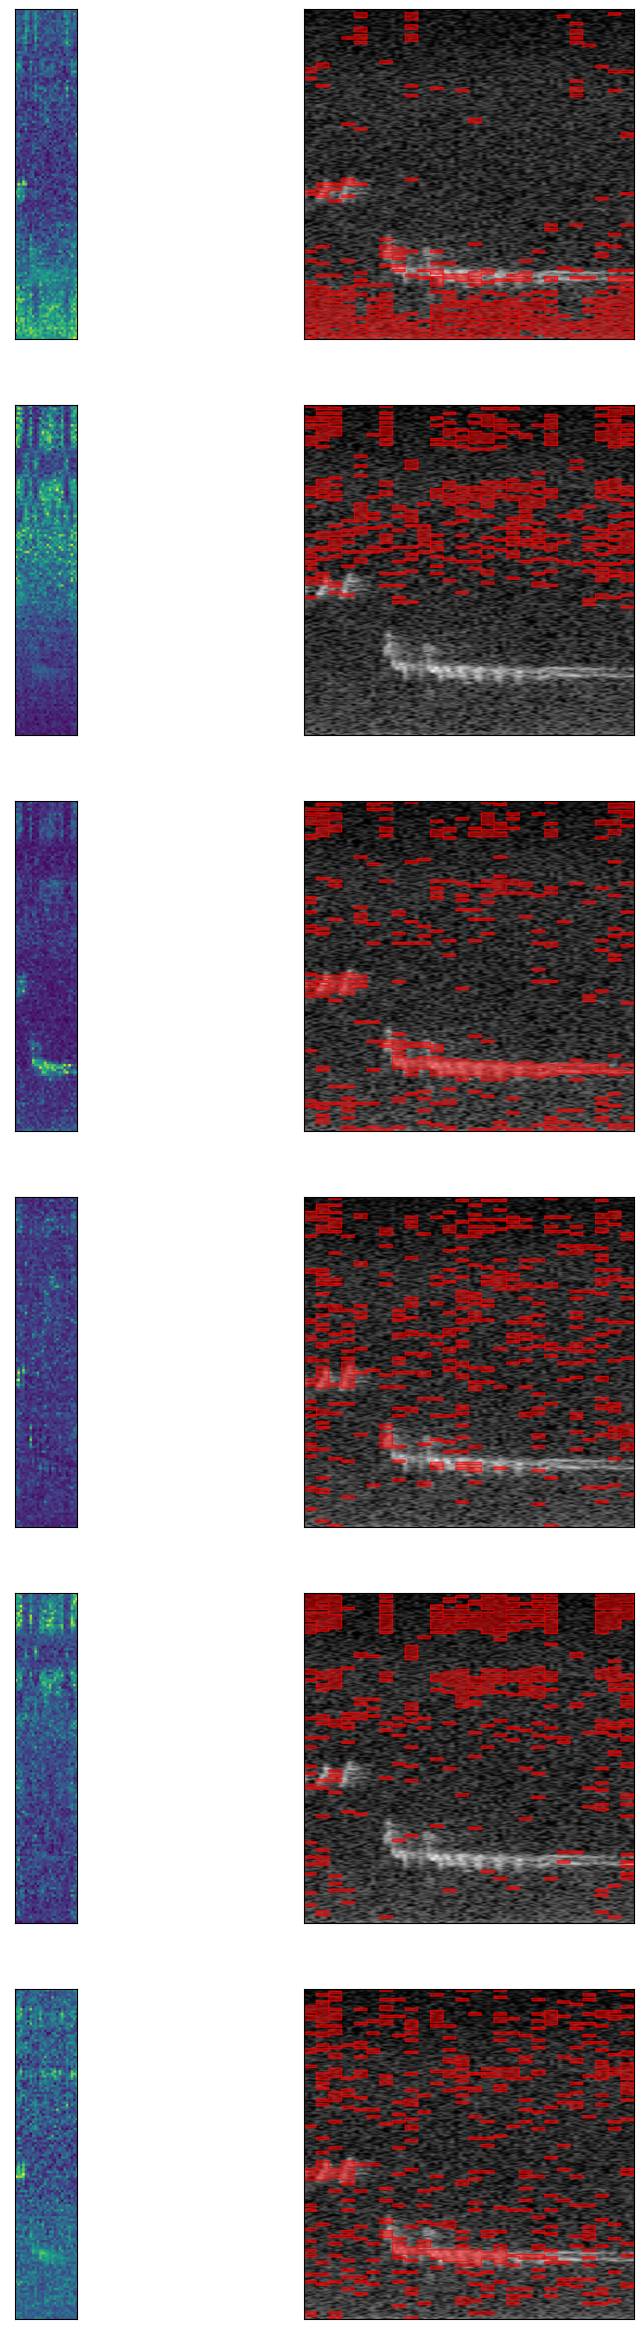

In [29]:
att0_image = Image.open(os.path.join(IMAGE_PATH, 'attn-head0.png'))
att1_image = Image.open(os.path.join(IMAGE_PATH, 'attn-head1.png'))
att2_image = Image.open(os.path.join(IMAGE_PATH, 'attn-head2.png'))
att3_image = Image.open(os.path.join(IMAGE_PATH, 'attn-head3.png'))
att4_image = Image.open(os.path.join(IMAGE_PATH, 'attn-head4.png'))
att5_image = Image.open(os.path.join(IMAGE_PATH, 'attn-head5.png'))
mask0_image = Image.open(os.path.join(IMAGE_PATH, 'mask_th_head0.png'))
mask1_image = Image.open(os.path.join(IMAGE_PATH, 'mask_th_head1.png'))
mask2_image = Image.open(os.path.join(IMAGE_PATH, 'mask_th_head2.png'))
mask3_image = Image.open(os.path.join(IMAGE_PATH, 'mask_th_head3.png'))
mask4_image = Image.open(os.path.join(IMAGE_PATH, 'mask_th_head4.png'))
mask5_image = Image.open(os.path.join(IMAGE_PATH, 'mask_th_head5.png'))
f = plt.figure(figsize=(2*5,2*15))
att00 = f.add_subplot(6,2,1)
att00.imshow(att0_image)
att00.axes.get_xaxis().set_visible(False)
att00.axes.get_yaxis().set_visible(False)
att01 = f.add_subplot(6,2,2)
att01.imshow(mask0_image)
att01.axes.get_xaxis().set_visible(False)
att01.axes.get_yaxis().set_visible(False)

att10 = f.add_subplot(6,2,3)
att10.imshow(att1_image)
att10.axes.get_xaxis().set_visible(False)
att10.axes.get_yaxis().set_visible(False)
att11 = f.add_subplot(6,2,4)
att11.imshow(mask1_image)
att11.axes.get_xaxis().set_visible(False)
att11.axes.get_yaxis().set_visible(False)

att20 = f.add_subplot(6,2,5)
att20.imshow(att2_image)
att20.axes.get_xaxis().set_visible(False)
att20.axes.get_yaxis().set_visible(False)
att21 = f.add_subplot(6,2,6)
att21.imshow(mask2_image)
att21.axes.get_xaxis().set_visible(False)
att21.axes.get_yaxis().set_visible(False)

att30 = f.add_subplot(6,2,7)
att30.imshow(att3_image)
att30.axes.get_xaxis().set_visible(False)
att30.axes.get_yaxis().set_visible(False)
att31 = f.add_subplot(6,2,8)
att31.imshow(mask3_image)
att31.axes.get_xaxis().set_visible(False)
att31.axes.get_yaxis().set_visible(False)

att40 = f.add_subplot(6,2,9)
att40.imshow(att4_image)
att40.axes.get_xaxis().set_visible(False)
att40.axes.get_yaxis().set_visible(False)
att41 = f.add_subplot(6,2,10)
att41.imshow(mask4_image)
att41.axes.get_xaxis().set_visible(False)
att41.axes.get_yaxis().set_visible(False)

att50 = f.add_subplot(6,2,11)
att50.imshow(att5_image)
att50.axes.get_xaxis().set_visible(False)
att50.axes.get_yaxis().set_visible(False)
att51 = f.add_subplot(6,2,12)
att51.imshow(mask5_image)
att51.axes.get_xaxis().set_visible(False)
att51.axes.get_yaxis().set_visible(False)

plt.show()

# Now let's visualize the Clusterization

Load the dimensionality reduction model saved in order to process the features from the single image

In [30]:
import torch
import numpy as np

from joblib import dump, load
from sklearn.neighbors import KNeighborsClassifier

In [31]:
dim_red_model = load('/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/Clusters/dim_red_model')
scale_model = load('/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/Clusters/scale_model')

# dim_red_model = load('/grand/projects/BirdAudio/Soundscapes/Clusters/ThirdClusters/dim_red_model')
# scale_model = load('/grand/projects/BirdAudio/Soundscapes/Clusters/ThirdClusters/scale_model')

# dim_red_model = load('/grand/projects/BirdAudio/Soundscapes/Clusters/SecondClusters/dim_red_model')
# scale_model = load('/grand/projects/BirdAudio/Soundscapes/Clusters/SecondClusters/scale_model')

Now load the singular image features!

In [32]:
single_img_feats = torch.load('/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/Single_Image_Attentional_Maps/feats.pt',map_location=torch.device('cpu'))
# single_img_feats = torch.load('/grand/projects/BirdAudio/Soundscapes/Single_Image_Attentional_Maps/feats.pt',map_location=torch.device('cpu'))
single_img_feats = scale_model.transform(single_img_feats)
single_img_feats.shape

(1, 384)

Now reduce the features dimensionality

In [33]:
singular_sample = dim_red_model.transform(single_img_feats)
singular_sample.shape

(1, 2)

Load the clusters generated from the features

In [34]:
clusters = np.load('/grand/projects/BirdAudio/Soundscapes/NIPS4Bplus/Clusters/clusters.npy', allow_pickle=True)
#clusters = np.load('/grand/projects/BirdAudio/Soundscapes/Clusters//clusters.npy', allow_pickle=True)
#clusters = np.load('/grand/projects/BirdAudio/Soundscapes/Clusters/SecondClusters/clusters.npy', allow_pickle=True)
vectors=clusters[()]['x']
labels=clusters[()]['y']

Let's check the number of clusters in labels, ignoring noise if present.

In [35]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 100
Estimated number of noise points: 0


Plot a sample of points from the data set

In [36]:
def choose_random_rows(an_array, n_samples):
    number_of_rows = an_array.shape[0]
    random_indices = np.random.choice(number_of_rows, size=n_samples, replace=False)
    random_rows = an_array[random_indices, :]
    return random_rows

X = choose_random_rows(vectors,5000)
#X = choose_random_rows(vectors,150000)
n_components=X.shape[1]

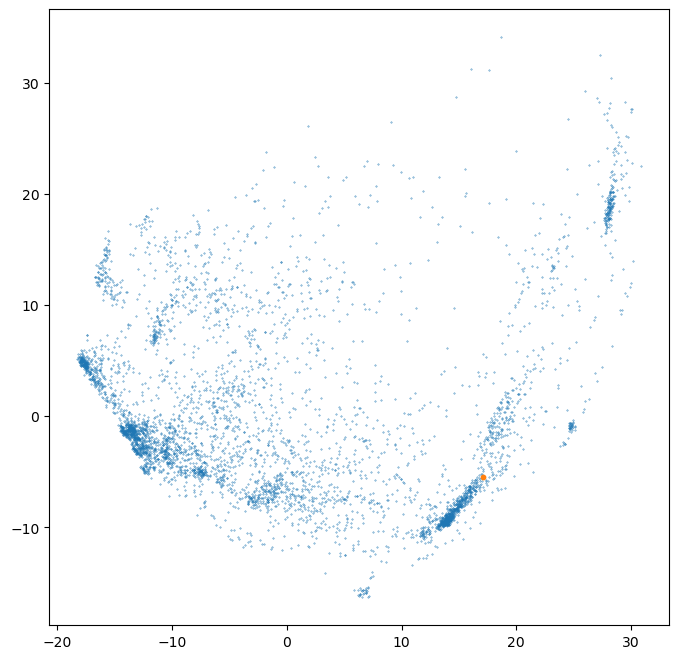

In [37]:
if n_components == 2:
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot()
    ax.scatter(X[:,0],X[:,1], s=0.1)
    ax.scatter(singular_sample[0,0],
               singular_sample[0,1],
               s=10
              )
elif n_components == 3:
    fig = plt.figure(figsize=(8,8))
    #ax = fig.add_subplot(projection='3d')
    ax = Axes3D(fig)
    ax.scatter(X[:,0], X[:,1], X[:,2])
    ax.scatter(
        singular_sample[0,0],
        singular_sample[0,1],
        singular_sample[0,2],
        s=60
    )

Train a k-nearest neighbor algorithm to predict the samples

In [38]:
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(vectors, labels)

KNeighborsClassifier(n_neighbors=10)

Classify the samples

In [39]:
label_predictions=neigh.predict(X)
core_samples_mask = np.zeros_like(label_predictions, dtype=bool)
core_samples_mask[label_predictions != -1] = True
n_noise_points = list(label_predictions).count(-1)
#set(label_predictions)

Plot them

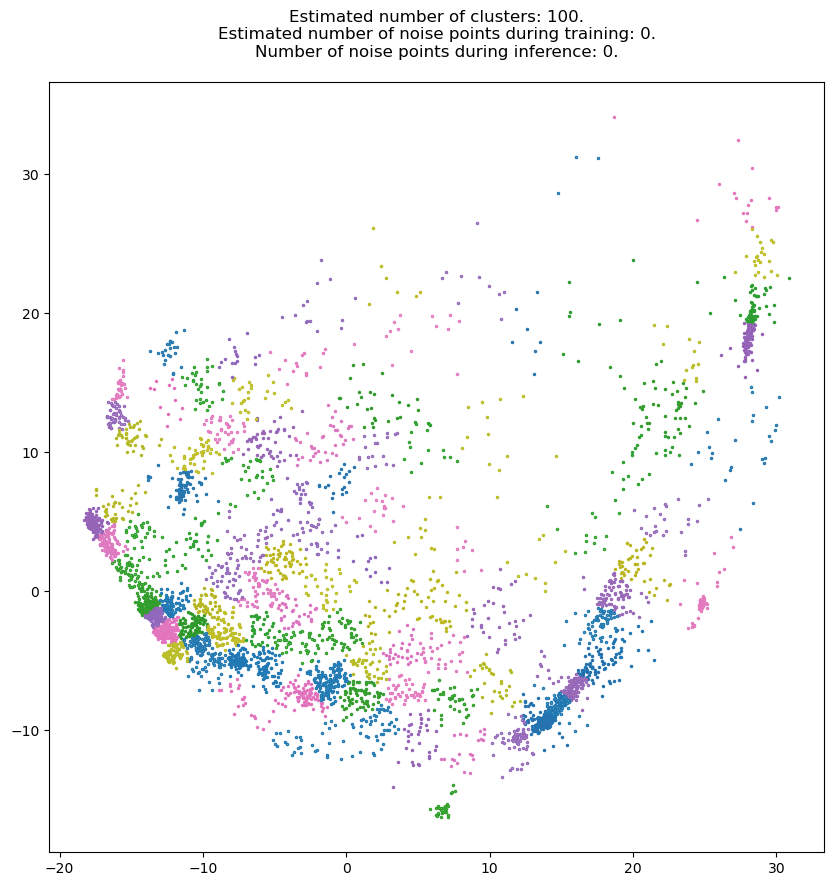

Estimated number of clusters: 100.
Estimated number of noise points during training: 0.
Number of noise points during inference: 0.



In [40]:
# Black removed and is used for noise instead.
print_outliers=True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
if n_components == 2:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = label_predictions == k
        #class_member_mask = labels == k
        xy = X[class_member_mask & core_samples_mask]
        ax.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            #markeredgecolor="k",
            markersize=1.5,
#             markersize=0.05,
        )

        if print_outliers:
            xy = X[class_member_mask & ~core_samples_mask]
            ax.plot(
                xy[:, 0],
                xy[:, 1],
                "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=6,
            )
    
    ax.plot(
        singular_sample[0,0],
        singular_sample[0,1],
        "o",
        #markerfacecolor="k",
        markersize=2,
    )

elif n_components == 3:
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = label_predictions == k
        #class_member_mask = labels == k
        xyz = X[class_member_mask & core_samples_mask]
        ax.scatter(
            xyz[:, 0],
            xyz[:, 1],
            xyz[:, 2],
            "o",
            c=[col],
            s=200,
        )

        if print_outliers:
            xyz = X[class_member_mask & ~core_samples_mask]
            ax.scatter(
                xyz[:, 0],
                xyz[:, 1],
                xyz[:, 2],
                "o",
                c=[col],
                s=100,
            )
    
    col = [1, 0, 0, 1]
    ax.scatter(
        singular_sample[0,0],
        singular_sample[0,1],
        singular_sample[0,2],
        "o",
        c=[col],
        s=300,
    )

string0 = "Estimated number of clusters: {}.\n"
string1 = "Estimated number of noise points during training: {}.\n"
string2 = "Number of noise points during inference: {}.\n"
string3 = "singular sample is of class: : {}.\n"
string = string0 + string1 + string2 #+ string3
plt.title(string .format(n_clusters_, n_noise_, n_noise_points, neigh.predict(singular_sample)[0]))

plt.show()

print(string .format(n_clusters_, n_noise_, n_noise_points, neigh.predict(singular_sample)[0]))

In [41]:
print('singular sample is of class: ', neigh.predict(singular_sample)[0])

singular sample is of class:  0


In [42]:
samples_per_cluster=[]
for i in range(n_clusters_):
    count = list(labels).count(i)
    samples_per_cluster.append(count)
    if count > 10:
        print('Cluster number:', i)
        print('with {} members.' .format(count))

count = list(labels).count(-1)
if count > 100:
    print('Random points')
    print('with {} members.' .format(count))

Cluster number: 0
with 88 members.
Cluster number: 1
with 136 members.
Cluster number: 2
with 138 members.
Cluster number: 3
with 18 members.
Cluster number: 4
with 33 members.
Cluster number: 5
with 459 members.
Cluster number: 6
with 37 members.
Cluster number: 7
with 239 members.
Cluster number: 8
with 128 members.
Cluster number: 9
with 54 members.
Cluster number: 10
with 33 members.
Cluster number: 11
with 43 members.
Cluster number: 12
with 41 members.
Cluster number: 13
with 227 members.
Cluster number: 14
with 76 members.
Cluster number: 16
with 97 members.
Cluster number: 17
with 55 members.
Cluster number: 18
with 31 members.
Cluster number: 19
with 45 members.
Cluster number: 20
with 104 members.
Cluster number: 21
with 280 members.
Cluster number: 22
with 38 members.
Cluster number: 23
with 21 members.
Cluster number: 24
with 11 members.
Cluster number: 25
with 20 members.
Cluster number: 26
with 66 members.
Cluster number: 27
with 91 members.
Cluster number: 28
with 70 mem

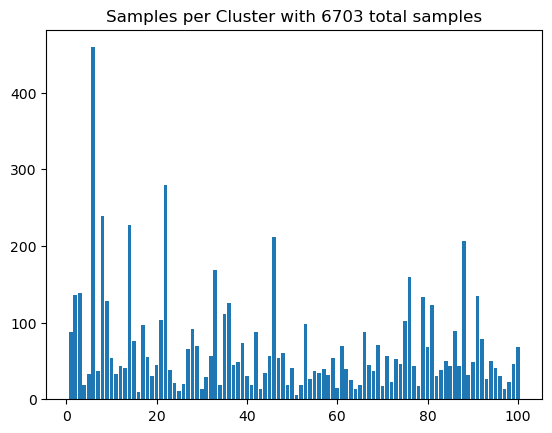

In [43]:
dom=[i+1 for i in range(len(samples_per_cluster))]
fig, ax = plt.subplots()
ax.bar(dom,samples_per_cluster)
ax.set_title('Samples per Cluster with {} total samples'.format(sum(samples_per_cluster)))
plt.show()